In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df_train =pd.read_csv('/content/happy_train.csv')
df_test = pd.read_csv('/content/happy_test.csv')

In [ ]:
df_train.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,NNVBBKZB,Female,73,RG268,Other,X3,43.0,No,1045696.0,No,0.0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32.0,No,581988.0,No,0.0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26.0,No,1484315.0,Yes,0.0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19.0,No,470454.0,No,0.0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33.0,No,886787.0,No,0.0


In [ ]:
df_train.shape

(245725, 11)

In [ ]:
df_test.head(3)

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No


In [ ]:
df_test.shape

(105312, 10)

## Checking The Missing Value Percentage For Train and Test

In [ ]:
(df_train.isnull().sum()/df_train.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.934073
Avg_Account_Balance     0.000000
Is_Active               0.000000
Is_Lead                 0.000000
dtype: float64

In [ ]:
(df_test.isnull().sum()/df_test.shape[0])*100

ID                      0.000000
Gender                  0.000000
Age                     0.000000
Region_Code             0.000000
Occupation              0.000000
Channel_Code            0.000000
Vintage                 0.000000
Credit_Product         11.890383
Avg_Account_Balance     0.000000
Is_Active               0.000000
dtype: float64

In [ ]:

df_test.drop('ID',inplace=True,axis=1)

In [ ]:
df_train.drop('ID',inplace=True,axis=1)

In [ ]:
df_train.drop('Region_Code',inplace= True,axis=1)
df_test.drop('Region_Code',inplace= True,axis=1)

In [ ]:
df_train.head(2)

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,Female,73,Other,X3,43,No,1045696,No,0
1,Female,30,Salaried,X1,32,No,581988,No,0


In [ ]:
df_test.head(2)

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,1,29,1,0,25,Yes,742366,No
1,1,43,1,1,49,NaN,925537,No


LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
encoder = LabelEncoder()

In [ ]:
df_train['Gender'] = encoder.fit_transform(df_train['Gender'])
df_train['Occupation'] = encoder.fit_transform(df_train['Occupation'])
df_train['Channel_Code'] = encoder.fit_transform(df_train['Channel_Code'])

# For Test Data

df_test['Gender'] = encoder.fit_transform(df_test['Gender'])
df_test['Occupation'] = encoder.fit_transform(df_test['Occupation'])
df_test['Channel_Code'] = encoder.fit_transform(df_test['Channel_Code'])



In [ ]:
df_test['Is_Active'] = encoder.fit_transform(df_test['Is_Active'])
df_train['Is_Active'] = encoder.fit_transform(df_train['Is_Active'])

In [ ]:
df_test['Credit_Product'] = encoder.fit_transform(df_test['Credit_Product'])
df_train['Credit_Product'] = encoder.fit_transform(df_train['Credit_Product'])

In [ ]:
df_train.head(2)


,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,Is_Lead
0,0,73,1,2,43,No,1045696,0,0
1,0,30,2,0,32,No,581988,0,0


## Handling Missing Values For Train and Test

In [ ]:
df_train['Credit_Product'].fillna(df_train['Credit_Product'].mode()[0], inplace = True)
df_test['Credit_Product'].fillna(df_test['Credit_Product'].mode()[0], inplace = True)

In [ ]:
df_train.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
Is_Lead                0
dtype: int64

In [ ]:
df_test.isnull().sum()

Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

## DataTypes For Train:

In [ ]:
# Finding out the integers variables
df_train.dtypes[df_train.dtypes == 'int64']

Gender                 int64
Age                    int64
Occupation             int64
Channel_Code           int64
Vintage                int64
Avg_Account_Balance    int64
Is_Lead                int64
dtype: object

In [ ]:
# Finding out the float variables
df_train.dtypes[df_train.dtypes == 'float64']

Series([], dtype: object)

In [ ]:
# Finding out the object variables
df_train.dtypes[df_train.dtypes == 'object']

ID                object
Region_Code       object
Credit_Product    object
Is_Active         object
dtype: object

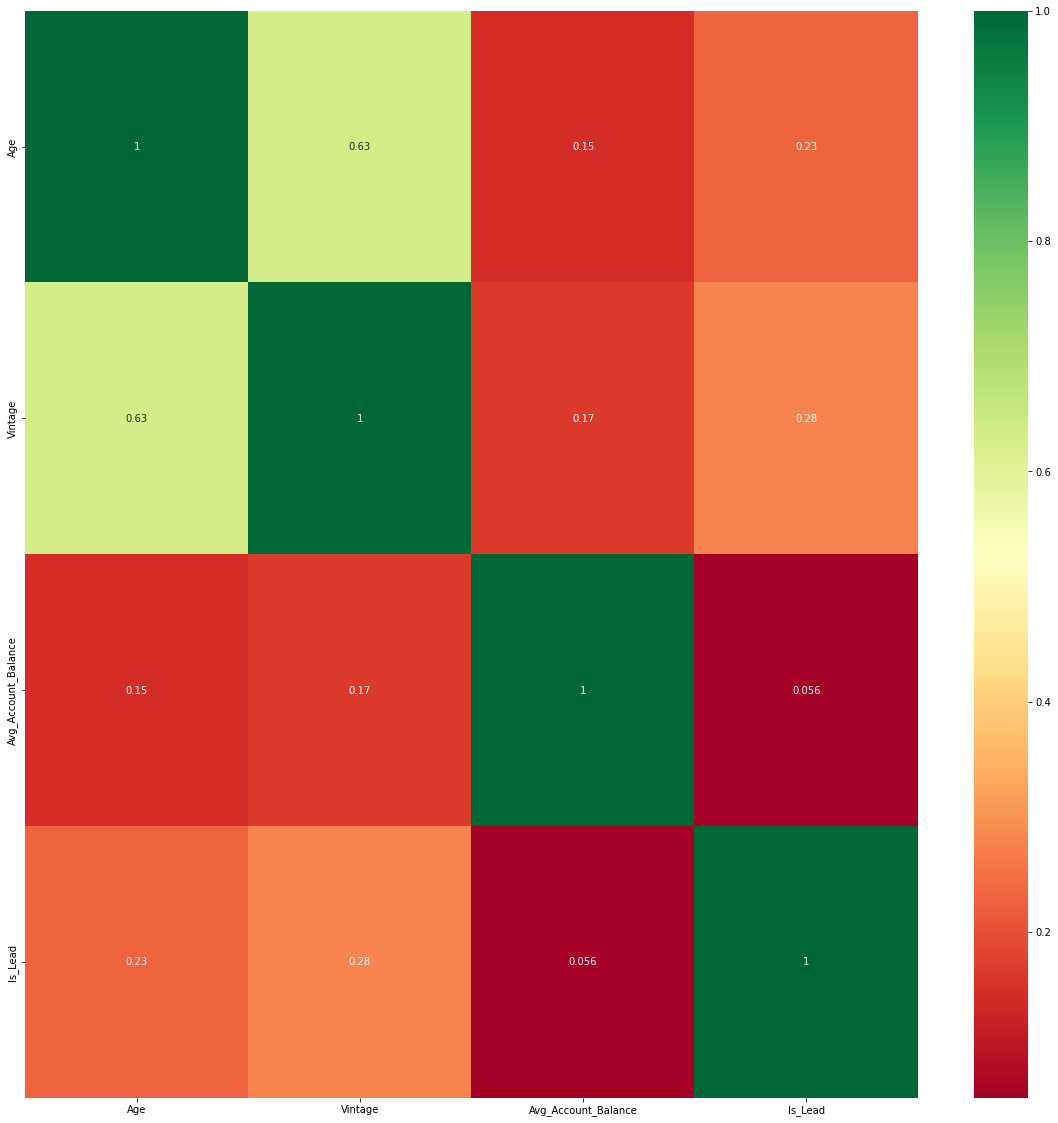

In [ ]:
#get correlations of each features in dataset
corrmat = df_train.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## EDA : Categorical-Categorical

In [ ]:
def BVA_categorical_plot(data, tar, cat):

  data = data[[cat,tar]][:]

  table = pd.crosstab(data[tar],data[cat],)
  f_obs = np.array([table.iloc[0][:].values,
                    table.iloc[1][:].values])

  chi, p, dof, expected = chi2_contingency(f_obs)

  if p<0.05:
    sig = True
  else:
    sig = False

  sns.countplot(x=cat, hue=tar, data=data)
  plt.title("p-value = {}\n difference significant? = {}\n Chi-square = {}".format(round(p,5),sig,round(chi,2)))

  ax1 = data.groupby(cat)[tar].value_counts(normalize=True).unstack()*100
  ax1.plot(kind='bar', stacked='True',title=str(ax1))
  int_level = data[cat].value_counts()  

In [ ]:
from scipy.stats import chi2_contingency
from numpy import sqrt, abs, round
from scipy.stats import t as t_dist
from numpy import sqrt, abs, round
from scipy.stats import norm
import warnings
warnings.filterwarnings(action = 'ignore')

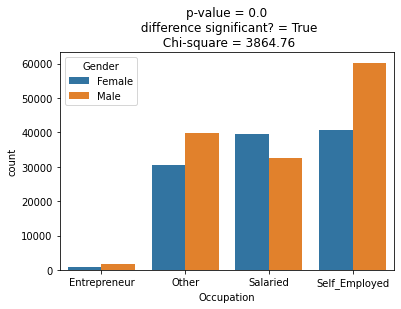

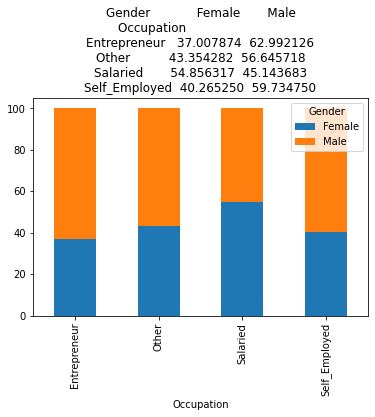

In [ ]:
BVA_categorical_plot(df_train, 'Gender', 'Occupation')

# implimenting the Model

In [ ]:
"""### Split Data"""
 
X = df_train.drop('Is_Lead', axis=1)
y = df_train['Is_Lead']
 
print('Shape of X = ', X.shape)
print('Shape of y = ', y.shape)

Shape of X =  (245725, 8)
Shape of y =  (245725,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=51,stratify=y)
 
print('Shape of X_train = ', X_train.shape)
print('Shape of y_train = ', y_train.shape)
print('Shape of X_test = ', X_test.shape)
print('Shape of y_test = ', y_test.shape)

Shape of X_train =  (196580, 8)
Shape of y_train =  (196580,)
Shape of X_test =  (49145, 8)
Shape of y_test =  (49145,)


In [ ]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicticing the Test set results
y_pred = lr_model.predict(X_test)


In [ ]:
# auc_roc implimentation
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred)

In [ ]:
roc_auc

0.5263111123790828

In [ ]:
#Applying GridSearch for Logistic Regression

from sklearn.model_selection import GridSearchCV

In [ ]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]

#Using GridSearchCV

model = GridSearchCV(LogisticRegression(), tuned_parameters, scoring = 'f1', cv=10)
model.fit(X_train, y_train)



GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='f1', verbose=0)

In [ ]:
roc_auc = model.best_score_

In [ ]:
roc_auc

0.1570559537226936

In [ ]:
model.best_estimator_

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#After Implimenting GridSearchCV again Train the model
lr_model = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
lr_model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Predicticing the Test set results
y_pred = lr_model.predict(X_test)


In [ ]:
# auc_roc implimentation
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test,y_pred)

In [ ]:
roc_auc

0.5263111123790828

In [ ]:
final_pred = lr_model.predict(df_test)
final_pred

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
df_test['prediction']= final_pred

In [ ]:
df_test.head()

,Gender,Age,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active,prediction
0,1,29,1,0,25,1,742366,0,1
1,1,43,1,1,49,0,925537,0,1
2,1,31,2,0,14,0,215949,0,1
3,1,29,1,0,33,0,868070,0,1
4,0,29,1,0,19,0,657087,0,1


# RandomForest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
 
rf = RandomForestClassifier()
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
y_pred1 = rf.predict(X_test)

In [ ]:
from sklearn.metrics import roc_curve,auc
false_positive__rate, true_positive_rate ,thresholds= roc_curve(y_test,y_pred1)
roc_auc = auc(false_positive__rate, true_positive_rate)
roc_auc

0.6152184052386058

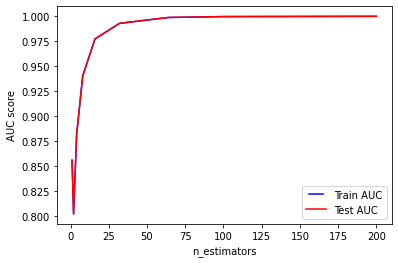

In [ ]:
n_estimators =[1,2,4,8,16,32,64,100,200]
train_results =[]
test_results =[]

for estimators in n_estimators:
  rf=RandomForestClassifier(n_estimators=estimators,n_jobs= -1)
  rf.fit(X_train,y_train)
  train_pred =rf.predict(X_train)
  false_positive__rate, true_positive_rate ,thresholds= roc_curve(y_train,train_pred)
  roc_auc = auc(false_positive__rate, true_positive_rate)
  train_results.append(roc_auc)
  y_pred1 = rf.predict(X_test)
  false_positive__rate, true_positive_rate ,thresholds= roc_curve(y_test,y_pred1)
  roc_auc = auc(false_positive__rate, true_positive_rate)
  test_results.append(roc_auc)



from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_estimators,train_results, "b",label ="Train AUC")
line2,= plt.plot(n_estimators,train_results, "r",label ="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_estimators")
plt.show()




# XGBoost

In [ ]:
from xgboost import XGBClassifier
 
classifier= XGBClassifier()
classifier.fit(X_train, y_train)
pred=xg.predict(X_test)
roc_auc2= roc_auc_score(pred,y_test) 
roc_auc2

0.754677243696499

In [ ]:
## Hyper Parameter Optimization

params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
    
}

In [ ]:
## Hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import xgboost

In [ ]:
def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))

In [ ]:
classifier1=xgboost.XGBClassifier()

In [ ]:
random_search=RandomizedSearchCV(classifier1,param_distributions=params,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
from datetime import datetime
# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  4.2min finished



 Time taken: 0 hours 4 minutes and 23.5 seconds.


In [ ]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
random_search.best_params_

{'colsample_bytree': 0.4,
 'gamma': 0.1,
 'learning_rate': 0.05,
 'max_depth': 5,
 'min_child_weight': 7}

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4, gamma=0.1,
              learning_rate=0.05, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train,cv=10)

In [ ]:
score

array([0.78787262, 0.78710957, 0.78812697, 0.78883915, 0.78772001,
       0.78695696, 0.79092481, 0.78660087, 0.78634653, 0.7880761 ])

In [ ]:
score.mean()

0.7878573608708922

In [ ]:
#df_train=pd.get_dummies(train,columns=[....])
#df_train=df_train.select_dtypes(exclude='object')